In [ ]:
def point_inside_polygon(lat,lng,poly):
    p1 = Point(lng,lat)
    if p1.within(poly):
        return True
    else:
        return False
    
def get_neighbourhood(row,gdf):
    for ix, area in gdf.iterrows():
        is_in_area=False
        if row['lat'] and row['lon'] and row['lat']!=0 and row['lon']!=0:
            is_in_area = point_inside_polygon(row['lat'], row['lon'], area['geometry'])
            if is_in_area:
                #found area, exit
                return area['name']
    return None

In [7]:
import pandas as pd
import numpy as np
import geopandas as gpd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tqdm import tqdm
import matplotlib.pyplot as plt 
tqdm.pandas()
from shapely.geometry import Point, Polygon
data_path = '../data/'

/Users/ida/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [15]:
def convert_columns_to_lowercase(df):
    df = df.rename(columns = {k:k.lower() for k in df.columns})
    return df

In [16]:
df_covid = pd.read_csv(data_path + 'COVID19_by_Neighborhood.csv')
df_covid = convert_columns_to_lowercase(df_covid)

In [12]:
renameDict = {'CERT':'cert1'}
df_covid = df_covid.rename(columns = renameDict)

In [14]:
{k:k.lower() for k in df_covid.columns}

{'FID': 'fid',
 'COMTY_NAME': 'comty_name',
 'cert1': 'cert1',
 'Shape_Leng': 'shape_leng',
 'Shape_Area': 'shape_area',
 'location': 'location',
 'cases': 'cases',
 'case_rate': 'case_rate',
 'deaths': 'deaths',
 'death_rate': 'death_rate',
 'Date': 'date',
 'Shape__Area': 'shape__area',
 'Shape__Length': 'shape__length'}

In [13]:
df_covid.head()

,FID,COMTY_NAME,cert1,Shape_Leng,Shape_Area,location,cases,case_rate,deaths,death_rate,Date,Shape__Area,Shape__Length
0,1,SYLMAR,yes,111633.753407,3.404014e+08,SYLMAR,14535,17640,184,223,2021/01/30,4.647324e+07,41236.137343
1,2,GRANADA HILLS,yes,89564.685903,4.264128e+08,GRANADA HILLS,5745,9873,137,235,2021/01/30,5.818514e+07,33094.502125
2,3,PORTER RANCH,yes,73616.951350,2.267371e+08,PORTER RANCH,2140,6013,23,65,2021/01/30,3.093173e+07,27183.552463
3,4,LAKEVIEW TERRACE,yes,75477.956189,1.448471e+08,LAKEVIEW TERRACE,2116,16112,30,228,2021/01/30,1.975813e+07,27863.458449
4,5,MISSION HILLS,yes,50728.509850,1.061586e+08,MISSION HILLS,3848,15951,96,398,2021/01/30,1.447757e+07,18746.395093


In [18]:
%%bash
cd ../data/LA_Times_Neighborhood_Boundaries-shp
ls

cfbcc20d-2c5d-4c30-9dfa-627d46ec1a742020328-1-9ulknm.pzqsm.cpg
cfbcc20d-2c5d-4c30-9dfa-627d46ec1a742020328-1-9ulknm.pzqsm.dbf
cfbcc20d-2c5d-4c30-9dfa-627d46ec1a742020328-1-9ulknm.pzqsm.prj
cfbcc20d-2c5d-4c30-9dfa-627d46ec1a742020328-1-9ulknm.pzqsm.shp
cfbcc20d-2c5d-4c30-9dfa-627d46ec1a742020328-1-9ulknm.pzqsm.shx


In [19]:
gdf = gpd.read_file(data_path + 'LA_Times_Neighborhood_Boundaries-shp/cfbcc20d-2c5d-4c30-9dfa-627d46ec1a742020328-1-9ulknm.pzqsm.shp')
gdf = convert_columns_to_lowercase(gdf)

In [20]:
gdf.head()

,objectid,name,geometry
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0..."
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2..."
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0..."
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788..."
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0..."


<AxesSubplot:>

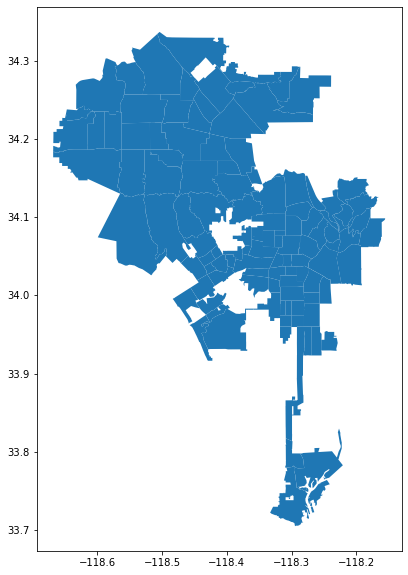

In [22]:
gdf.plot(figsize = (10,10))

In [23]:
df_crime = pd.read_csv(data_path + 'Crime_Data_from_2020_to_Present.csv')
df_crime = convert_columns_to_lowercase(df_crime)

In [24]:
df_crime.head()

,dr_no,date rptd,date occ,time occ,area,area name,rpt dist no,part 1-2,crm cd,crm cd desc,mocodes,vict age,vict sex,vict descent,premis cd,premis desc,weapon used cd,weapon desc,status,status desc,crm cd 1,crm cd 2,crm cd 3,crm cd 4,location,cross street,lat,lon
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [28]:
def sum_coordinates(row):
    return row['lat']+ row['lon']

In [29]:
df_crime['sumcoord'] = df_crime.apply(lambda row: sum_coordinates(row),axis = 1)

In [30]:
df_crime.head()

,dr_no,date rptd,date occ,time occ,area,area name,rpt dist no,part 1-2,crm cd,crm cd desc,mocodes,vict age,vict sex,vict descent,premis cd,premis desc,weapon used cd,weapon desc,status,status desc,crm cd 1,crm cd 2,crm cd 3,crm cd 4,location,cross street,lat,lon,sumcoord
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,-84.2837
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,-84.2086
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,-84.2891
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,-84.2334
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,-84.2270


In [25]:
dfc = df_crime.head(10000) # sample 10,0000

In [32]:
def point_inside_polygon(lat,lng,poly):
    p1 = Point(lng,lat)
    if p1.within(poly):
        return True
    else:
        return False
    
def get_neighbourhood(row,gdf):
    for ix, area in gdf.iterrows(): # geometry df
        is_in_area=False
        if row['lat'] and row['lon'] and row['lat']!=0 and row['lon']!=0:
            is_in_area = point_inside_polygon(row['lat'], row['lon'], area['geometry'])
            if is_in_area:
                #found area, exit
                return area['name']
    return None

In [33]:
dfc['name'] = dfc.progress_apply(lambda row: get_neighbourhood(row,gdf), axis = 1)



100%|██████████| 10000/10000 [01:30<00:00, 110.39it/s]
<ipython-input-33-5acc60d73ec9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['name'] = dfc.progress_apply(lambda row: get_neighbourhood(row,gdf), axis = 1)


In [34]:
dfc.head()

,dr_no,date rptd,date occ,time occ,area,area name,rpt dist no,part 1-2,crm cd,crm cd desc,mocodes,vict age,vict sex,vict descent,premis cd,premis desc,weapon used cd,weapon desc,status,status desc,crm cd 1,crm cd 2,crm cd 3,crm cd 4,location,cross street,lat,lon,name
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,Exposition Park
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,Downtown
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2004 1820 0913 0329 1202,62,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,Florence
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,Valley Village
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,Panorama City


In [35]:
crime_counts = dfc[['name','dr_no']].groupby('name').count().reset_index().rename(columns = {'dr_no':'n'})
crime_counts

,name,n
0,Adams-Normandie,69
1,Arleta,4
2,Arlington Heights,57
3,Atwater Village,23
4,Baldwin Hills/Crenshaw,146
5,Bel-Air,14
6,Beverly Crest,23
7,Beverly Grove,198
8,Beverlywood,13
9,Boyle Heights,423


In [ ]:
# fig, ax = plt.subplots(figsize = (30,30)) 
# gdf[gdf.location!='CENTRAL'].plot(ax = ax, color = 'blue')
# gdf[gdf.location=='CENTRAL'].plot(ax = ax, color = 'red')

In [ ]:
gdf[gdf.fid==75]

In [36]:
gdf = gdf.merge(crime_counts,on = 'name',how = 'left')

In [37]:
gdf.head()

,objectid,name,geometry,n
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",69.0
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",4.0
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0...",57.0
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",23.0
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0...",146.0


<ipython-input-44-d2ef1ee917c5>:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['name'], xy=row['coords'],horizontalalignment='center',fontsize=9,color = 'white')


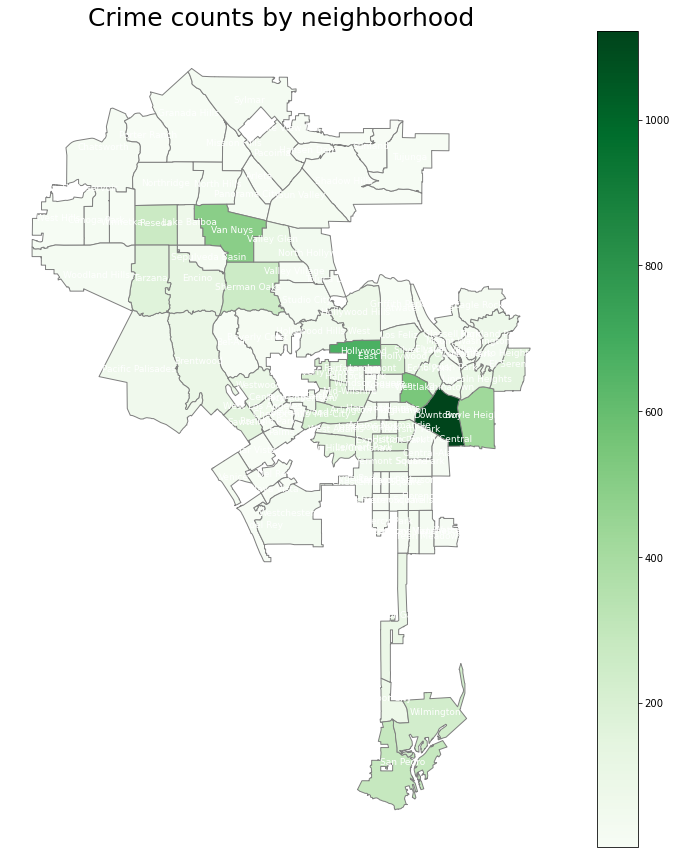

In [44]:
fig, ax = plt.subplots(1,figsize = (15,15)) # create figure and axes for Matplotlib
ax.set_title('Crime counts by neighborhood',
            fontdict={'fontsize': '25', 'fontweight' : '3'})

vmin = gdf.n.min()
vmax = gdf.n.max()

gdf.plot(column = 'n',cmap = 'Greens',linewidth = 1, ax = ax, edgecolor = '.5')
# remove the axis
ax.axis('off')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

#add colorbar
cbar = fig.colorbar(sm)

# Add location for the labels
gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]

# Display names 
for idx, row in gdf.iterrows():
    plt.annotate(s=row['name'], xy=row['coords'],horizontalalignment='center',fontsize=9,color = 'white')

Matplotlib colormaps:
https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [45]:
gdf2 = gpd.read_file(data_path + 'COVID19_by_Neighborhood-shp/COVID19_by_Neighborhood.shp')
gdf2 = convert_columns_to_lowercase(gdf2)


In [46]:
gdf2.head()

,fid,comty_name,cert,shape_leng,shape_area,location,cases,case_rate,deaths,death_rate,date,shape__are,shape__len,geometry
0,1,GRANADA HILLS,yes,89564.685903,4.264128e+08,GRANADA HILLS,457,785,48,82,2020-06-18,5.818514e+07,33094.502125,"POLYGON ((-118.54219 34.29860, -118.54084 34.2..."
1,2,PORTER RANCH,yes,73616.951350,2.267371e+08,PORTER RANCH,111,312,7,20,2020-06-18,3.093173e+07,27183.552463,"POLYGON ((-118.59618 34.27462, -118.59377 34.2..."
2,3,LAKEVIEW TERRACE,yes,75477.956189,1.448471e+08,LAKEVIEW TERRACE,158,1203,4,30,2020-06-18,1.975813e+07,27863.458449,"POLYGON ((-118.40834 34.28671, -118.40755 34.2..."
3,4,MISSION HILLS,yes,50728.509850,1.061586e+08,MISSION HILLS,214,887,10,41,2020-06-18,1.447757e+07,18746.395093,"POLYGON ((-118.47067 34.29432, -118.46554 34.2..."
4,5,ANGELES NATIONAL FOREST,yes,92240.837542,1.458565e+08,ANGELES NATIONAL FOREST,1,2500,0,0,2020-06-18,1.989453e+07,34046.544055,"POLYGON ((-118.33605 34.28250, -118.33494 34.2..."


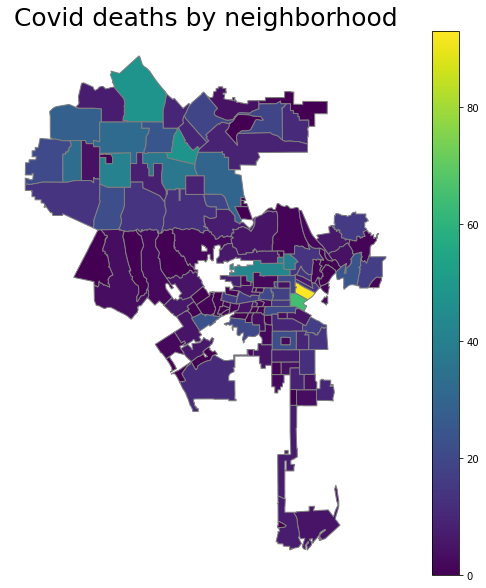

In [48]:
fig, ax = plt.subplots(1,figsize = (10,10)) # create figure and axes for Matplotlib
ax.set_title('Covid deaths by neighborhood',
            fontdict={'fontsize': '25', 'fontweight' : '3'})

vmin = gdf2.deaths.min()
vmax = gdf2.deaths.max()

gdf2.plot(column = 'deaths',cmap = 'viridis',linewidth = 1, ax = ax, edgecolor = '.5')
# remove the axis
ax.axis('off')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

#add colorbar
cbar = fig.colorbar(sm)

# Add location for the labels
gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]

# # Display names 
# for idx, row in gdf.iterrows():
#     plt.annotate(s=row['n'], xy=row['coords'],horizontalalignment='center',fontsize=9)

In [ ]:
gdf2 = gdf2.merge(df_covid[['fid','cases','case_rate','deaths','death_rate']], on = 'fid')

In [ ]:
gdf2.head()

### Spatial joins using sjoin

### 1 to many mappings

In [ ]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)